# ESSAI API

In [35]:
import requests
import pandas as pd

# Appel de l'API pour récupérer des données alimentaires
url = "https://world.openfoodfacts.org/api/v0/product/737628064502.json"
response = requests.get(url)
data = response.json()

# Extraction des informations pertinentes
product = {
    "nom": data["product"]["product_name"],
    "calories": data["product"]["nutriments"]["energy-kcal_100g"],
    "proteines": data["product"]["nutriments"]["proteins_100g"],
    "glucides": data["product"]["nutriments"]["carbohydrates_100g"],
    "lipides": data["product"]["nutriments"]["fat_100g"]
}
print(product)


{'nom': 'Thai peanut noodle kit includes stir-fry rice noodles & thai peanut seasoning', 'calories': 385, 'proteines': 9.62, 'glucides': 71.15, 'lipides': 7.69}


# CSV Téléchargé

### Extrait des premières 100 lignes de teste car le fichier a 10Go et quelques lignes posent des problèmes :

In [36]:

import pandas as pd

path = "/Users/lua/wild_IA/projet_fil_rouge/OFD/data/en.openfoodfacts.org.products.csv"

data = pd.read_csv(path, on_bad_lines='skip', nrows=100, delimiter='\t')
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,54,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1582569031,2020-02-24T18:30:31Z,1733085204,2024-12-01T20:33:24Z,NaN,1733085204,2024-12-01T20:33:24Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1673620307,2023-01-13T14:31:47Z,1732913331,2024-11-29T20:48:51Z,insectproductadd,1732913331,2024-11-29T20:48:51Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,http://world-en.openfoodfacts.org/product/0000...,inf,1634745456,2021-10-20T15:57:36Z,1734203090,2024-12-14T19:04:50Z,smoothie-app,1734366039,2024-12-16T16:20:39Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1722606455,2024-08-02T13:47:35Z,1734216390,2024-12-14T22:46:30Z,smoothie-app,1734216390,2024-12-14T22:46:30Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,http://world-en.openfoodfacts.org/product/0000...,prepperapp,1716818343,2024-05-27T13:59:03Z,1732748475,2024-11-27T23:01:15Z,foodvisor,1734373452,2024-12-16T18:24:12Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Extrait des seulement les colonnes d'intêret et divisé par chunks :

In [ ]:
# Définir les colonnes d'intérêt
colonnes_interet = [
    "product_name", "brands", "categories", "countries_en", "ecoscore_grade",
    "energy-kcal_100g", "fat_100g", "carbohydrates_100g", "sugars_100g",
    "fiber_100g", "proteins_100g", "salt_100g"
]
chunk_size = 100000  # Nombre de lignes par chunk

# Lire et traiter le fichier par morceaux
chunks = []
for chunk in pd.read_csv(path, delimiter='\t', on_bad_lines='skip', chunksize=chunk_size):
    # Garder seulement les colonnes d'intérêt
    chunk_filtered = chunk[colonnes_interet]
    chunks.append(chunk_filtered)

# Concaténer tous les morceaux en un DataFrame complet
data = pd.concat(chunks, ignore_index=True)

# Afficher les premières lignes
data.head()


In [38]:
# Sauvegarder le DataFrame filtré dans un nouveau fichier CSV
data.to_csv("/Users/lua/wild_IA/projet_fil_rouge/OFD/data/filtered_products.csv", index=False)

In [39]:
path_filtered = "/Users/lua/wild_IA/projet_fil_rouge/OFD/data/filtered_products.csv"
data_filtered = pd.read_csv(path_filtered)
data_filtered.head()

,product_name,brands,categories,countries_en,ecoscore_grade,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,Limonade artisanale a la rose,NaN,NaN,France,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tablette Tanzanie,NaN,NaN,France,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CORDYCEPS,Cordyceps Sinensis,Vitamins,"France,Germany,United States",unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chai orcas sin azucar,David rio,olio di mandorle dolci,United States,unknown,70.0,4.00,3.00,0.0,NaN,1.00,NaN
4,Hello fresh,Hello fresh,Smoked meat,Greece,unknown,195.0,10.73,14.63,2.2,0.98,0.51,0.0


In [40]:
# Vérification des valeurs manquantes
print("Valeurs manquantes :")
print(data_filtered.isnull().sum())

Valeurs manquantes :
product_name           202364
brands                1480586
categories            2014793
countries_en            24322
ecoscore_grade          28683
energy-kcal_100g       946766
fat_100g               929549
carbohydrates_100g     924896
sugars_100g           1006824
fiber_100g            2313682
proteins_100g          924045
salt_100g             1267547
dtype: int64


In [41]:
# Étape 1 : Remplacer les valeurs manquantes dans 'brands' et 'categories' par 'unknown'
data_filtered['brands'] = data_filtered['brands'].fillna('unknown')
data_filtered['categories'] = data_filtered['categories'].fillna('unknown')

# Étape 2 : Supprimer les colonnes inutiles
cols_to_drop = ['ecoscore_grade', 'fiber_100g', 'salt_100g', 'sugars_100g']
data_filtered = data_filtered.drop(columns=cols_to_drop)

# Étape 3 : Supprimer les lignes contenant des valeurs manquantes
data_filtered = data_filtered.dropna()

# Étape 4 : Enregistrer le dataset nettoyé dans un nouveau fichier CSV
path_cleaned = "/Users/lua/wild_IA/projet_fil_rouge/OFD/data/cleaned_products.csv"
data_filtered.to_csv(path_cleaned, index=False)



In [42]:
path_cleaned = "/Users/lua/wild_IA/projet_fil_rouge/OFD/data/cleaned_products.csv"
data_cleaned = pd.read_csv(path_cleaned)
data_cleaned.head()

,product_name,brands,categories,countries_en,energy-kcal_100g,fat_100g,carbohydrates_100g,proteins_100g
0,chai orcas sin azucar,David rio,olio di mandorle dolci,United States,70.000000,4.000000,3.000000,1.000000
1,Hello fresh,Hello fresh,Smoked meat,Greece,195.000000,10.730000,14.630000,0.510000
2,Marinara,Newman's own,en:sample,Germany,56.451613,2.016129,8.064516,1.612903
3,Artikel 1,"EWL, bla",Gemüse,"France,Germany",208.000000,0.000000,8.000000,0.000000
4,Allumettes de bacon,Le marsigny,Butfalo mac and cheese,Spain,124.000000,5.000000,0.800000,19.000000


In [43]:
import matplotlib.pyplot as plt


# Étape 1 : Statistiques descriptives générales
print("Statistiques descriptives des colonnes numériques :")
print(data_cleaned.describe())

print("\nColonnes catégoriques :")
print(data_cleaned[['brands', 'categories', 'countries_en']].describe())


Statistiques descriptives des colonnes numériques :
       energy-kcal_100g      fat_100g  carbohydrates_100g  proteins_100g
count      2.518559e+06  2.518559e+06        2.518559e+06   2.518559e+06
mean       4.534339e+10  3.369422e+01        4.777395e+01   2.923736e+01
std        6.364421e+13  3.150895e+04        3.150605e+04   3.150611e+04
min        0.000000e+00  0.000000e+00       -1.000000e+00  -8.330000e+00
25%        1.070000e+02  9.000000e-01        3.570000e+00   1.600000e+00
50%        2.580000e+02  7.000000e+00        1.562500e+01   6.300000e+00
75%        3.980000e+02  2.100000e+01        5.200000e+01   1.300000e+01
max        1.000000e+17  5.000000e+07        5.000000e+07   5.000000e+07

Colonnes catégoriques :
         brands categories countries_en
count   2518559    2518559      2518559
unique   243671     191005         6288
top     unknown    unknown       France
freq     963331    1294754       707174


In [44]:
print(data_cleaned[['energy-kcal_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g']].describe())


       energy-kcal_100g      fat_100g  carbohydrates_100g  proteins_100g
count      2.518559e+06  2.518559e+06        2.518559e+06   2.518559e+06
mean       4.534339e+10  3.369422e+01        4.777395e+01   2.923736e+01
std        6.364421e+13  3.150895e+04        3.150605e+04   3.150611e+04
min        0.000000e+00  0.000000e+00       -1.000000e+00  -8.330000e+00
25%        1.070000e+02  9.000000e-01        3.570000e+00   1.600000e+00
50%        2.580000e+02  7.000000e+00        1.562500e+01   6.300000e+00
75%        3.980000e+02  2.100000e+01        5.200000e+01   1.300000e+01
max        1.000000e+17  5.000000e+07        5.000000e+07   5.000000e+07


### Normalisation des valeurs numériques pour faire les graphs :

In [45]:
data_cleaned = data_cleaned[
    (data_cleaned['energy-kcal_100g'] >= 0) & (data_cleaned['energy-kcal_100g'] <= 900) &
    (data_cleaned['fat_100g'] >= 0) & (data_cleaned['fat_100g'] <= 100) &
    (data_cleaned['carbohydrates_100g'] >= 0) & (data_cleaned['carbohydrates_100g'] <= 100) &
    (data_cleaned['proteins_100g'] >= 0) & (data_cleaned['proteins_100g'] <= 100)
]

In [46]:
# Arrondir les colonnes numériques à 1 décimale
columns_to_round = ['energy-kcal_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g']
data_cleaned[columns_to_round] = data_cleaned[columns_to_round].round(1)


In [47]:
print(data_cleaned.describe())


       energy-kcal_100g      fat_100g  carbohydrates_100g  proteins_100g
count      2.514544e+06  2.514544e+06        2.514544e+06   2.514544e+06
mean       2.702836e+02  1.345952e+01        2.778942e+01   9.270368e+00
std        1.869973e+02  1.720472e+01        2.756289e+01   1.099582e+01
min        0.000000e+00  0.000000e+00        0.000000e+00   0.000000e+00
25%        1.060000e+02  9.000000e-01        3.600000e+00   1.600000e+00
50%        2.570000e+02  7.000000e+00        1.560000e+01   6.300000e+00
75%        3.970000e+02  2.100000e+01        5.200000e+01   1.300000e+01
max        9.000000e+02  1.000000e+02        1.000000e+02   1.000000e+02


In [48]:
data_cleaned.head(10)

,product_name,brands,categories,countries_en,energy-kcal_100g,fat_100g,carbohydrates_100g,proteins_100g
0,chai orcas sin azucar,David rio,olio di mandorle dolci,United States,70.0,4.0,3.0,1.0
1,Hello fresh,Hello fresh,Smoked meat,Greece,195.0,10.7,14.6,0.5
2,Marinara,Newman's own,en:sample,Germany,56.5,2.0,8.1,1.6
3,Artikel 1,"EWL, bla",Gemüse,"France,Germany",208.0,0.0,8.0,0.0
4,Allumettes de bacon,Le marsigny,Butfalo mac and cheese,Spain,124.0,5.0,0.8,19.0
5,Creamy Peanut Butter,Signature Select,"Dietary supplements, Bodybuilding supplements,...",United States,450.0,29.7,37.8,7.0
6,Flohsamenschalen,Vita2You,unknown,Spain,16.0,0.5,2.0,1.0
7,Zaatar,Eat Well,"Snacks, Desserts, Sweet snacks, Biscuits and c...",France,316.0,0.5,72.6,0.5
8,Organic Peanut Butter Powder,PBFit,"Meals, Rice dishes, Risottos, Snack",Switzerland,217.0,13.0,15.0,8.8
9,Süßlupinen Mehl,"Wohltuer, InFuuzed 720 DGREE, Piksters",en:open-beauty-facts,Germany,296.0,6.9,6.0,31.2


In [50]:
path_final_cleaned = "/Users/lua/wild_IA/projet_fil_rouge/OFD/data/final_cleaned_products.csv"
data_cleaned.to_csv(path_final_cleaned, index=False)

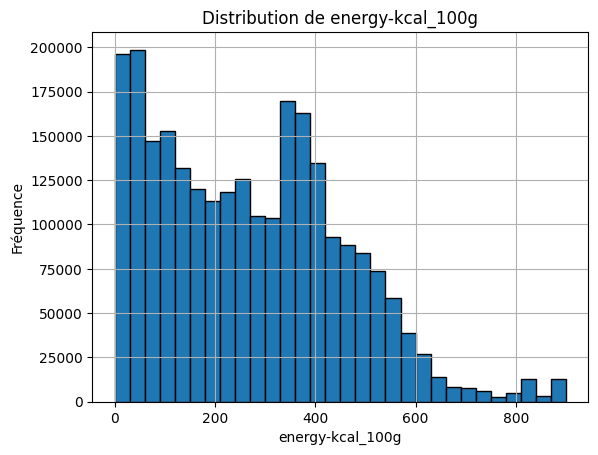

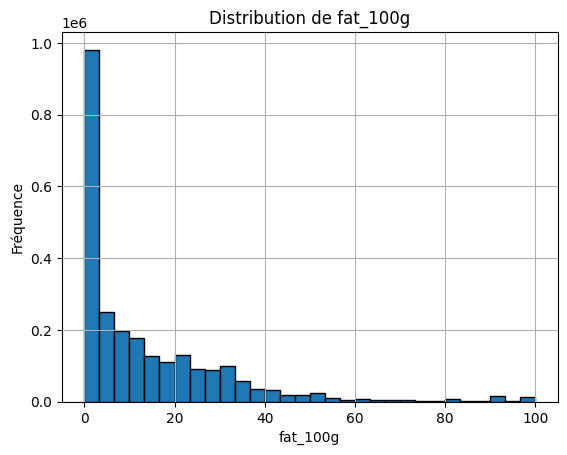

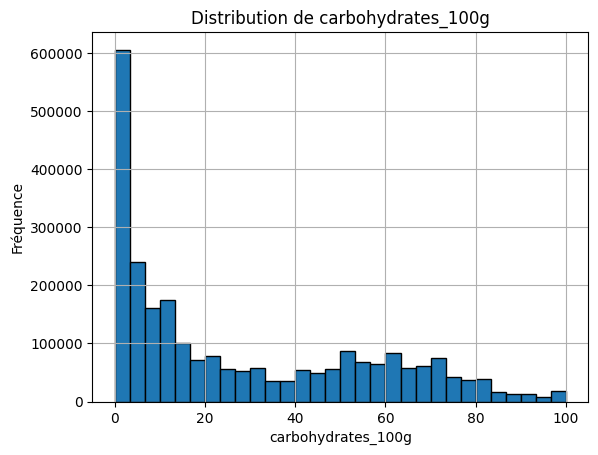

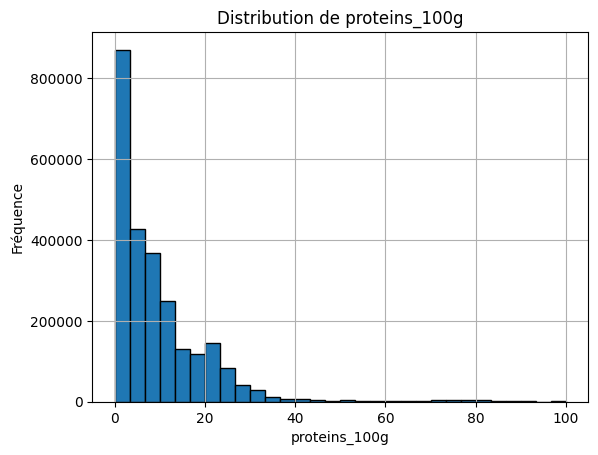

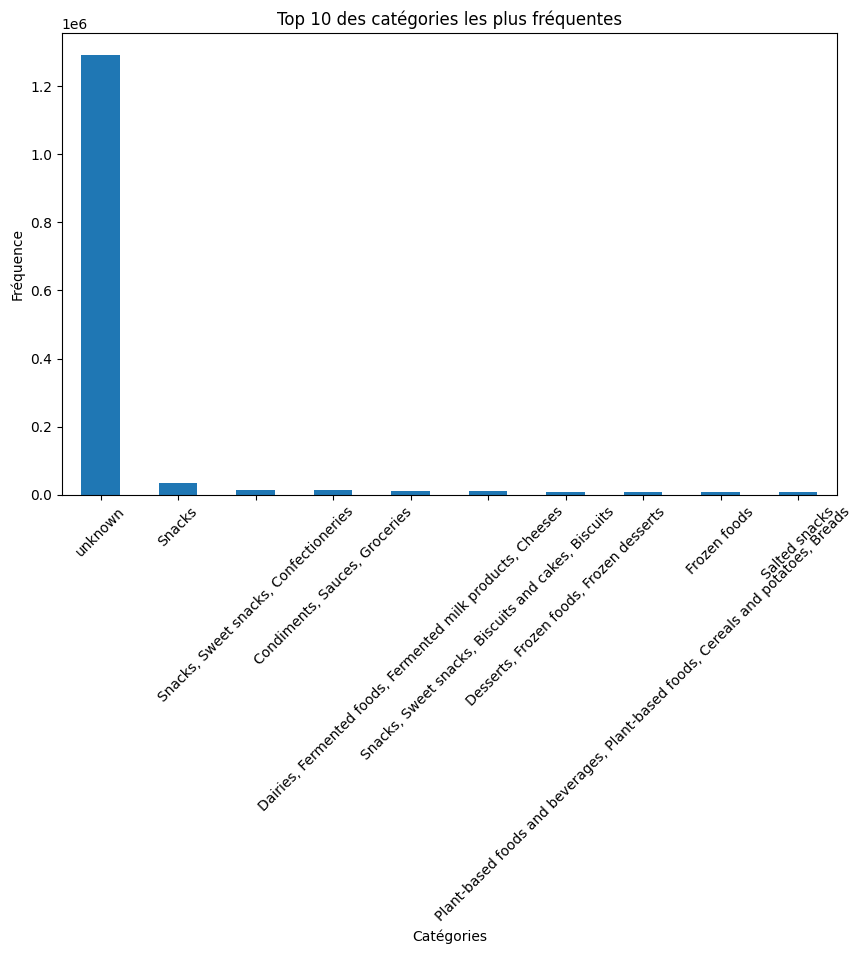

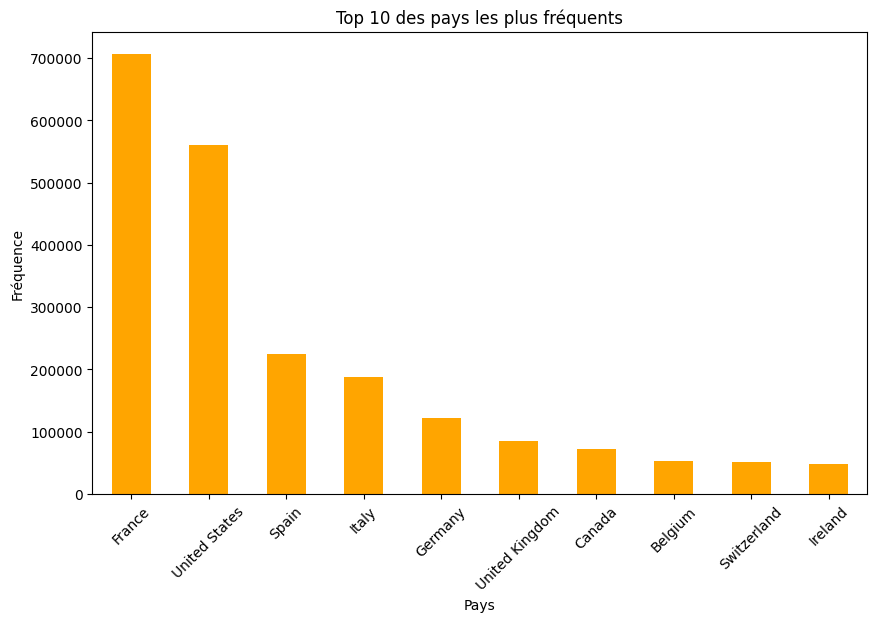

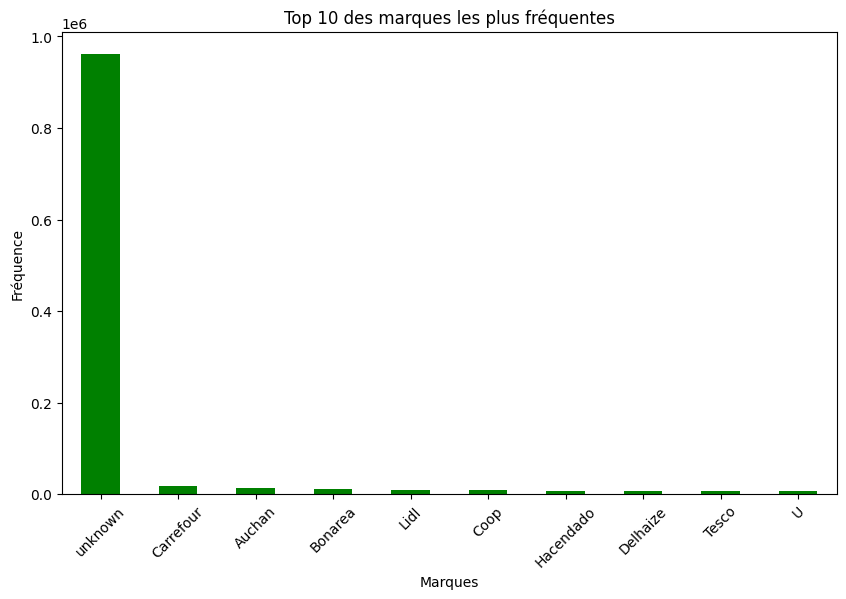

In [49]:
# Étape 2 : Visualisation des colonnes clés
# Distribution des valeurs nutritionnelles
columns_nutrition = ['energy-kcal_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g']

for col in columns_nutrition:
    plt.figure()
    data_cleaned[col].hist(bins=30, edgecolor='black')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

# Distribution des catégories
plt.figure(figsize=(10, 6))
data_cleaned['categories'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 des catégories les plus fréquentes")
plt.xlabel("Catégories")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.show()

# Distribution des pays
plt.figure(figsize=(10, 6))
data_cleaned['countries_en'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 des pays les plus fréquents")
plt.xlabel("Pays")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.show()

# Marques les plus fréquentes
plt.figure(figsize=(10, 6))
data_cleaned['brands'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 des marques les plus fréquentes")
plt.xlabel("Marques")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.show()